In [21]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import os
import pandas

os.chdir('/Users/sreelakshmirajendrakumar/Downloads')

#reading the data from the file and gettin gthe values of X and Y
datasetTrain = pandas.read_csv('project3_F2019_Q1Train.csv')
datasetTest = pandas.read_csv('project3_F2019_Q1Test.csv')
XTrain=datasetTrain.iloc[:,0:4]
XTrain=XTrain.to_numpy()
YTrain=datasetTrain.iloc[:,4:8]
YTrain=YTrain.to_numpy()

XTest=datasetTest.iloc[:,0:4]
XTest=XTest.to_numpy()
YTest=datasetTest.iloc[:,4:8]
YTest=YTest.to_numpy()

In [22]:
def sumColumn(a):
    '''finding the sum of elements along the column'''
    (row,column)=np.shape(a)
    sum=[]
    for i in range (0,column):
        temp=0
        for j in range(0,row):
            temp+=a[j][i]
        sum.append(temp)
    return sum      

def ridgeRegression(X,Y,D,Lambda):
    '''finding the value of parameters'''
    y_mean=[]
    x_mean=[]
    (N,q)=np.shape(Y)
    (N,d)=np.shape(X)
    X_mean=sumColumn(X) # 1xd
    Y_mean=sumColumn(Y) # 1xq
    X_mean=np.divide(X_mean,N) # 1xd
    Y_mean=np.divide(Y_mean,N) # 1xd
    
    #creating Nxd matrix of mean for the ease of  subtraction
    for i in range(0,N):
        y_mean.append(Y_mean) #Nxd
        x_mean.append(X_mean) #Nxd
  
    X_mean=X_mean.T # making the dimension dx1
    Y_mean=Y_mean.T # making the dimension qx1
    Xc=np.subtract(X,x_mean)
    Yc=np.subtract(Y,y_mean)
    
    #applying the equations:
    '''equation for b'''
    toBeInversed=np.matmul(Xc.T,Xc)+np.multiply(Lambda,np.array(D)) # dxd
    toBeMultiplied=np.linalg.inv(toBeInversed) # dxd
    toBeMultipliedAgain=np.matmul(toBeMultiplied,Xc.T) # dxN
    b=np.matmul(toBeMultipliedAgain,Yc) # dxq
    
    '''equation for beta'''
    toBeSubtracted=np.matmul(b.T,X_mean) # qx1
    beta=np.subtract(Y_mean,toBeSubtracted) # qx1
    
    return b,beta # dxq and qx1


# applying the equation f(x)=beta+b.Tx (qx1=qx1+(qxd)(dx1)) ==>equation for one sample
# equation for all samples is: Y=beta+Xb (Nxq=Nxq+(Nxd)(dxq))    
def mainFunction(b,beta,X): # dxq, qx1, Nxd
    '''function to apply the equation to all the samples'''
    N=len(X)
    BETA=[]
    for i in range(0,N):
        BETA.append(beta) # Nxq
    YPredict=BETA+np.matmul(X,b)
    
    return YPredict

def predictionError(Y,yPredict):
    '''function to clculate prediction error'''
    predError=0
    (YRow,YColumn)=np.shape(Y)
    for i in range(0,YRow):
        for j in range(0,YColumn):
            predError+=(Y[i][j]-yPredict[i][j])**2
            
    return predError

The value of b when lambda=1 is:

[[ 0.91221822  2.01446233  0.02846698  0.00584396]
 [ 1.07114707 -0.05292298  0.09874603 -0.01865044]
 [-0.08583268  0.08892974  0.96951019  1.95419905]
 [-0.01226142 -0.03961818  1.01911641 -0.03114583]]


The value of beta when lambda=1 is:

[-0.02814743 -0.0592892   0.13686881 -0.12354881]


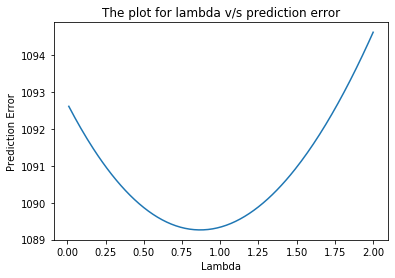

In [23]:
B,Beta=ridgeRegression(XTrain,YTrain,np.eye(4,4),1)
a=mainFunction(B,Beta,XTest)
D=np.eye(4)
theLambda=np.arange(0.01,2.01,0.01)

# answering the question
theError=[]

for index,Lambda in enumerate(theLambda): 
    '''YPredict.append([])
    tempB,tempBeta=ridgeRegression(XTrain,YTrain,D,Lambda)
    YPredict[index].append(mainFunction(tempB,tempBeta,XTest))
    theError.append()'''
    B,Beta=ridgeRegression(XTrain,YTrain,D,Lambda)
    yPredict=mainFunction(B,Beta,XTest)
    theError.append(predictionError(YTest,yPredict))
    
# compute the prediction error for each Lambda 
   
# plot error vs Lambda
plt.plot(theLambda,theError) 
plt.xlabel('Lambda')
plt.ylabel('Prediction Error') 
plt.title('The plot for lambda v/s prediction error') 
# estimated values of beta and b when Lamda=1
bLambdaOne,betaLambdaOne=ridgeRegression(XTrain,YTrain,D,1)
print('The value of b when lambda=1 is:\n')
print(bLambdaOne)
print('\n')
print('The value of beta when lambda=1 is:\n')
print(betaLambdaOne)